![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/02_Decision%20Tree.%20A%20Supervised%20Classification%20Model/02_decision-tree_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 02 | Decision Tree. A Supervised Classification Model

# Load the Data

Load the dataset from [CIS](https://www.cis.es/cis/opencms/ES/index.html) executing the lines of code below:
> - The goal of this dataset is
> - To predict `internet_usage` of **people** (rows)
> - Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd #!

df_internet = pd.read_excel('../data/internet_usage_spain.xlsx', sheet_name=1)
df_internet

,name,internet_usage,sex,age,education
0,Josefina,0,Female,66,Elementary
1,Vicki,1,Male,72,Elementary
...,...,...,...,...,...
2453,Christine,1,Male,31,High School
2454,Kimberly,0,Male,52,Elementary


# Data Preprocessing

1. The Python function to fit the model cannot process information as a string. Therefore, you need to convert **categorical variables to dummy variables**.
2. You need to check for **missing data** and drop it in case there are.

First of all, we need to put the `name` column as the index of the `DataFrame` because this information is not relevant to predict wether a person used internet or not.

In [2]:
df_internet.set_index('name', inplace=True)

In [3]:
df_internet

,internet_usage,sex,age,education
name,,,,
Josefina,0,Female,66,Elementary
Vicki,1,Male,72,Elementary
...,...,...,...,...
Christine,1,Male,31,High School
Kimberly,0,Male,52,Elementary


In [4]:
pd.get_dummies(data=df_internet, drop_first=True)

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
name,,,,,,,,
Josefina,0,66,0,0,0,0,0,0
Vicki,1,72,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
Christine,1,31,1,1,0,0,0,0
Kimberly,0,52,1,0,0,0,0,0


In [5]:
df_internet = pd.get_dummies(data=df_internet, drop_first=True)

In [6]:
df_internet.isna().sum()

internet_usage            0
age                       0
sex_Male                  0
education_High School     0
education_Higher Level    0
education_No studies      0
education_PhD             0
education_University      0
dtype: int64

## `DecisionTreeClassifier()` Model in Python

### Fit the Model

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
model_dt = DecisionTreeClassifier()

In [12]:
model_dt.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [13]:
explanatory = df_internet.drop(columns='internet_usage')

In [14]:
target = df_internet.internet_usage

In [15]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier()

### Calculate Predictions

In [16]:
model_dt.predict(X=explanatory)

array([0, 0, 1, ..., 0, 1, 0])

### Create a New DataFrame for the Predictions

In [17]:
df_pred = df_internet[['internet_usage']].copy()

In [18]:
df_pred['pred_dt'] = model_dt.predict(X=explanatory)

In [20]:
df_pred.sample(5, random_state=3)

,internet_usage,pred_dt
name,,
Larry,0,0
James,0,0
Ronald,1,1
Susan,1,1
Michelle,0,0


### Visualize the Model

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

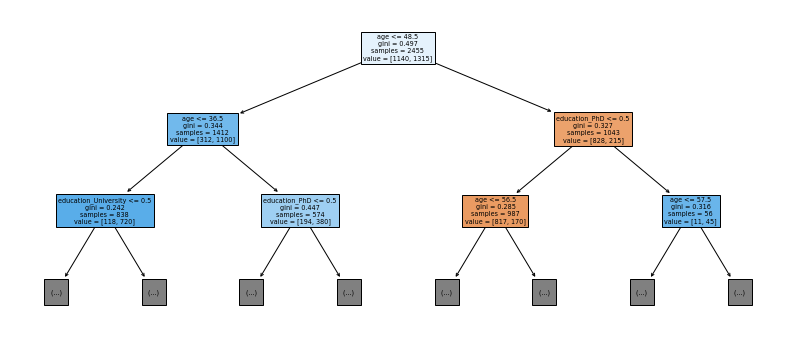

In [22]:
plt.figure(figsize=(14,6))
plot_tree(decision_tree=model_dt, max_depth=2, feature_names=explanatory.columns, filled=True);

### Model Interpretation

In [23]:
dic_feature_imp = dict(zip(model_dt.feature_names_in_, model_dt.feature_importances_))

In [24]:
series_feature_imp = pd.Series(dic_feature_imp)

In [25]:
series_feature_imp.sort_values()

education_No studies      0.006915
education_Higher Level    0.034675
sex_Male                  0.036481
education_University      0.044786
education_High School     0.050112
education_PhD             0.085421
age                       0.741609
dtype: float64

In [26]:
series_feature_imp = series_feature_imp.sort_values()

The `age` is the most important variable, followed by `education_PhD`:

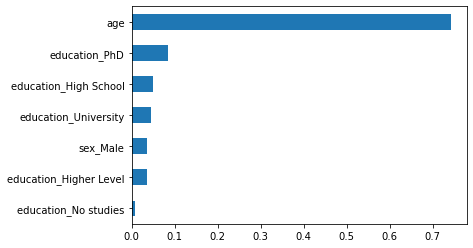

In [27]:
series_feature_imp.plot.barh();

### Model's Score

In [28]:
model_dt.score(X=explanatory, y=target)

0.859877800407332

## Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
confusion_matrix(
    y_true=df_pred.internet_usage,
    y_pred=df_pred.pred_dt
)

array([[ 983,  157],
       [ 187, 1128]])

In [33]:
cm = confusion_matrix(
    y_true=df_pred.internet_usage,
    y_pred=df_pred.pred_dt
)

In [34]:
CM = ConfusionMatrixDisplay(cm)

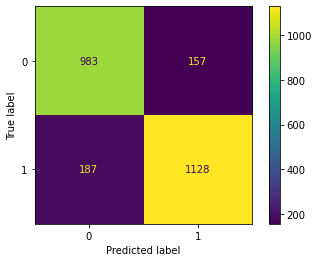

In [35]:
CM.plot();

### Classification Report

In [36]:
from sklearn.metrics import classification_report

In [37]:
report = classification_report(
    y_true=df_pred.internet_usage,
    y_pred=df_pred.pred_dt
)

In [38]:
print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1140
           1       0.88      0.86      0.87      1315

    accuracy                           0.86      2455
   macro avg       0.86      0.86      0.86      2455
weighted avg       0.86      0.86      0.86      2455



In [40]:
report = classification_report(
    y_true=df_pred.internet_usage,
    y_pred=df_pred.pred_dt,
    output_dict=True
)

In [41]:
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.840171,0.877821,0.859878,0.858996,0.860338
recall,0.862281,0.857795,0.859878,0.860038,0.859878
f1-score,0.851082,0.867692,0.859878,0.859387,0.859979
support,1140.000000,1315.000000,0.859878,2455.000000,2455.000000


### Sensitivity (Recall=1)

In [42]:
cm[1,1]

1128

In [43]:
cm[1,:]

array([ 187, 1128])

In [44]:
cm[1,1]/cm[1,:].sum()

0.8577946768060837

In [45]:
sensitivity = cm[1,1]/cm[1,:].sum()

### Specificity (Recall=0)

In [46]:
cm[0,0]

983

In [47]:
cm[0,:]

array([983, 157])

In [48]:
cm[0,0]/cm[0,:].sum()

0.862280701754386

In [49]:
sensitivity = cm[0,0]/cm[0,:].sum()

### ROC Curve

In [50]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [51]:
from sklearn.metrics import RocCurveDisplay

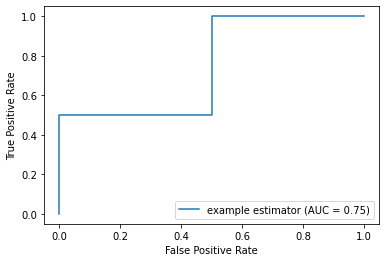

In [52]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> from sklearn import metrics
>>> y = np.array([0, 0, 1, 1])
>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred)
>>> roc_auc = metrics.auc(fpr, tpr)
>>> display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
...                                   estimator_name='example estimator')
>>> display.plot()
>>> plt.show()

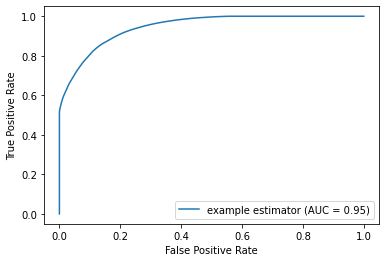

In [53]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> from sklearn import metrics
>>> y = df_internet.internet_usage
>>> pred = model_dt.predict_proba(X=explanatory)[:,1]
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred)
>>> roc_auc = metrics.auc(fpr, tpr)
>>> display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
...                                   estimator_name='example estimator')
>>> display.plot()
>>> plt.show()

## `RandomForestClassifier()` in Python

### Fit the Model

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model_rf = RandomForestClassifier()

In [56]:
model_rf.fit(X=explanatory, y=target)

RandomForestClassifier()

### Calculate Predictions

In [57]:
model_rf.predict(X=explanatory)

array([0, 0, 1, ..., 0, 1, 0])

In [60]:
df_pred['pred_rf'] = model_rf.predict(X=explanatory)

### Model's Score

In [61]:
model_rf.score(X=explanatory, y=target)

0.859877800407332

## `SVC()` in Python

### Fit the Model

In [62]:
from sklearn.svm import SVC

In [63]:
model_sv = SVC()

In [64]:
model_sv.fit(X=explanatory, y=target)

SVC()

### Calculate Predictions

In [65]:
model_sv.predict(X=explanatory)

array([0, 0, 1, ..., 0, 1, 0])

In [66]:
df_pred['pred_sv'] = model_rf.predict(X=explanatory)

### Model's Score

In [67]:
model_sv.score(X=explanatory, y=target)

0.7837067209775967

## Which One Is the Best Model? Why?

In [68]:
model_dt.score(X=explanatory, y=target)

0.859877800407332

In [69]:
model_rf.score(X=explanatory, y=target)

0.859877800407332

In [70]:
model_sv.score(X=explanatory, y=target)

0.7837067209775967

In [72]:
df_pred.head(10)

,internet_usage,pred_dt,pred_rf,pred_sv
name,,,,
Josefina,0,0,0,0
Vicki,1,0,0,0
David,1,1,1,1
Curtis,0,0,1,1
Josephine,1,1,1,1
Malinda,1,1,1,1
Fern,1,1,1,1
Sue,1,1,1,1
Juanita,1,1,1,1


## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how **the Decision Tree Algorithm** is just counting observations to determine the outcome.
- [ ] Another way to **compare real data with predictions** from the model.
- [ ] Not all model visualizations are equal.
    - A tree was visualized instead of an `scatterplot()` to interpret the model.
- [ ] Distinguish **probability's role** to optimize this type of models.
- [ ] Know how to determine **why a variable is important** in the model.
    - Why is it giving significant differences?
    - How does EDA helps us to see it?
- [ ] Understand the process of the algorithm to determine if we need to **normalize/scale** the data.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.